# Descriptive Statistics

In [1]:
# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Adjust default matplotlib settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

In [3]:
# Read in cleaned data
df_cces = pd.read_parquet('../Data/CCES/CCES_Panel_cleaned.parquet')

In [9]:
# Count features
len([col for col in df_cces.columns if col not in ['caseid','weight','year']])      

124

## Responses

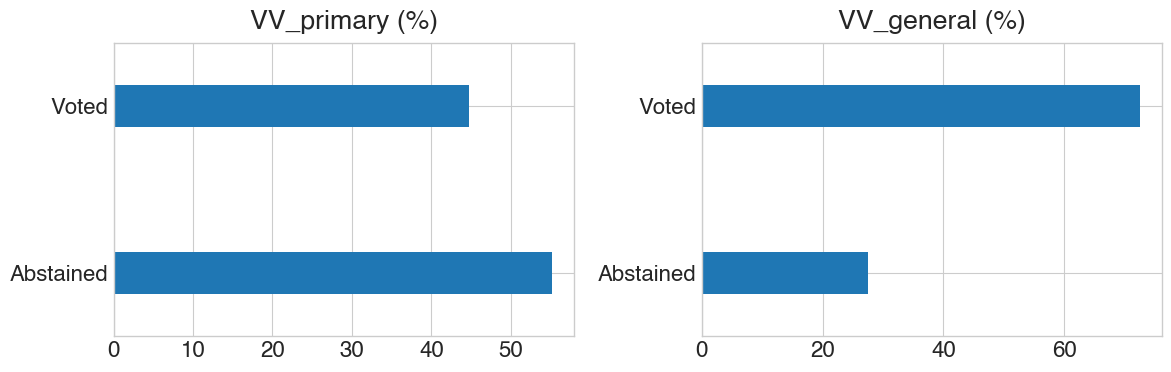

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
for i, var in enumerate(['VV_primary', 'VV_general']):
    df_temp = df_cces.query('year == 2014')[var] \
        .value_counts(normalize=True) * 100
    
    df_temp.index = df_temp.index.reorder_categories(['Abstained', 'Voted'])
    df_temp.sort_index() \
        .plot(kind='barh', ax=ax[i], ylabel='', width=.25)
            
    ax[i].set_title(var + ' (%)')

plt.tight_layout()
# Save as svg
#plt.savefig('responses.svg', format='svg')

In [34]:
# 2014 primaries
df_cces.query('year == 2014')['VV_primary'] \
    .value_counts(normalize=True)*100

VV_primary
Abstained    55.210526
Voted        44.789474
Name: proportion, dtype: float64

In [35]:
# 2014 general
df_cces.query('year == 2014')['VV_general'] \
    .value_counts(normalize=True)*100

VV_general
Voted        72.515789
Abstained    27.484211
Name: proportion, dtype: float64

In [36]:
# 2012 primaries
df_cces.query('year == 2012')['VV_primary'] \
    .value_counts(normalize=True)*100

VV_primary
Abstained    56.863158
Voted        43.136842
Name: proportion, dtype: float64

In [37]:
# 2012 general
df_cces.query('year == 2012')['VV_general'] \
    .value_counts(normalize=True)*100

VV_general
Voted        75.094737
Abstained    24.905263
Name: proportion, dtype: float64

In [38]:
# 2010 primaries
df_cces.query('year == 2010')['VV_primary'] \
    .value_counts(normalize=True)*100

VV_primary
Voted        50.8
Abstained    49.2
Name: proportion, dtype: float64

In [39]:
# 2010 general
df_cces.query('year == 2010')['VV_general'] \
    .value_counts(normalize=True)*100

VV_general
Voted        74.136842
Abstained    25.863158
Name: proportion, dtype: float64

## Features

In [40]:
# Look at variables
for col in df_cces.columns:
    print(col)

caseid
weight
year
301_1
301_2
301_3
301_4
301_5
301b
302
304
305
308a
308b
308c
308d
308e
309a
309b
309c
309d
310a
310b
310c
310d
315a
315b
315c
316
317
320
321
322_1
322_2
322_3
324
325
326
327
328
329
330A
330B
330C
330D
330E
330F
330G
330H
341A
341B
341C
341F
341R
350
406a
414_1
414_2
414_3
414_4
414_5
414_6
414_7
415r
416r
417a_1
417a_2
417a_3
417a_4
417a_5
417a_6
418a
421a
422a
422b
423a
423b
425a
425b_1
425b_2
425b_3
425b_4
VV_general
VV_primary
addrlength_1
addrlength_2
birthyr
cdid
child18
citylength_1
citylength_2
educ
employ
faminc
gender
healthins_1
healthins_2
healthins_3
healthins_4
healthins_5
healthins_6
hispanic
ideo5
immstat
inputstate
internethome
internetwork
investor
marstat
milstat_1
milstat_2
milstat_3
milstat_4
milstat_5
newsint
ownhome
pew_bornagain
pew_churatd
pew_prayer
pew_religimp
phone
pid3
pid7
race
religpew
union
unionhh


In [41]:
''' Let's look at the descriptive statistics of some selected
features, i.e., demographic variables '''
# birthyr ==> age
# educ
# faminc
# gender
# ideo5
# race

# Create new data frame for selected vars in 2014
df_descr = df_cces[['birthyr','educ', 'faminc','gender',
                    'ideo5','race','year']] \
                        .query('year == 2014') \
                            .drop('year', axis=1) \
                                .reset_index(drop=True) \
                                    .copy()

In [42]:
df_descr

,birthyr,educ,faminc,gender,ideo5,race
0,1950,4-year,"120,000 - 149,999",Male,Conservative,White
1,1986,Post-grad,"30,000 - 39,999",Female,Very liberal,White
2,1952,Some college,"60,000 - 69,999",Female,Conservative,White
3,1965,4-year,Prefer not to say,Female,Liberal,White
4,1948,Post-grad,"80,000 - 99,999",Male,Liberal,White
...,...,...,...,...,...,...
9495,1980,Post-grad,"Less than 10,000",Male,Liberal,Hispanic
9496,1974,Post-grad,"70,000 - 79,999",Male,Conservative,Hispanic
9497,1959,2-year,"30,000 - 39,999",Female,Very liberal,Hispanic
9498,1951,Some college,"80,000 - 99,999",Male,Conservative,Hispanic


In [43]:
# Convert birthyr to (approx.) age
df_descr.insert(1, 'age', 2014 - df_descr['birthyr'])
df_descr.drop('birthyr', axis=1, inplace=True)

In [44]:
df_descr.describe()

,age
count,9500.000000
mean,59.743053
std,11.633161
min,22.000000
25%,53.000000
50%,61.000000
75%,67.000000
max,95.000000


In [62]:
df_descr.query('age < 40')

,age,educ,faminc,gender,ideo3,race
1,28,Post-grad,"30,000 - 59,999",Female,Liberal,White
38,31,4-year,"60,000 - 99,999",Male,Moderate,White
95,30,4-year,"30,000 - 59,999",Male,Conservative,White
101,32,Some college,"60,000 - 99,999",Male,Liberal,White
160,34,Post-grad,"60,000 - 99,999",Female,Liberal,Black
...,...,...,...,...,...,...
9477,35,4-year,"60,000 - 99,999",Male,Moderate,Hispanic
9482,39,Some college,"30,000 - 59,999",Female,NaN,Black
9488,30,4-year,"30,000 - 59,999",Female,Moderate,Hispanic
9493,32,4-year,"30,000 - 59,999",Female,Liberal,Hispanic


In [45]:
df_descr['educ'].value_counts(dropna=False)

educ
4-year                  2801
Some college            2268
High school graduate    1903
Post-grad               1501
2-year                   909
No HS                    118
Name: count, dtype: int64

In [46]:
round(df_descr.value_counts('educ', normalize=True, dropna=False)*100,2)

educ
4-year                  29.48
Some college            23.87
High school graduate    20.03
Post-grad               15.80
2-year                   9.57
No HS                    1.24
Name: proportion, dtype: float64

In [47]:
df_descr['faminc'].value_counts()

faminc
Prefer not to say    1263
80,000 - 99,999       959
50,000 - 59,999       842
40,000 - 49,999       812
30,000 - 39,999       797
70,000 - 79,999       739
60,000 - 69,999       702
100,000 - 119,999     700
20,000 - 29,999       697
120,000 - 149,999     622
10,000 - 19,999       468
150,000 - 199,999     403
Less than 10,000      187
200,000 - 249,999     146
250,000 - 349,999     106
350,000 - 499,999      31
500,000 or more        25
250,000 or more         1
25,000 - 29,999         0
20,000 - 24,999         0
150,000 or more         0
15,000 - 19,999         0
10,000 - 14,999         0
Name: count, dtype: int64

In [48]:
# Merge some income categories for summary table
def merge_incomecat(income):

    result = None
    
    if income in ['Less than 10,000', '10,000 - 19,999', '20,000 - 29,999']:
        result = 'Less than 30,000'
    elif income in ['30,000 - 39,999', '40,000 - 49,999', '50,000 - 59,999']:
        result = '30,000 - 59,999'
    elif income in ['60,000 - 69,999', '70,000 - 79,999', '80,000 - 99,999']:
        result = '60,000 - 99,999'
    elif income in ['100,000 - 119,999', '120,000 - 149,999']:
        result = '100,000 - 149,999'
    elif income in ['150,000 - 199,999', '200,000 - 249,999']:
        result = '150,000 - 249,999'
    elif income in ['250,000 - 349,999', '350,000 - 499,999', '500,000 or more', '350,000 or more', '250,000 or more']:
        result = '250,000 or more'
    else:
        result = income
    
    return result

df_descr['faminc'] = df_descr['faminc'].apply(merge_incomecat)

In [49]:
round(df_descr['faminc'].value_counts(dropna=False, normalize=True)*100,2)

faminc
30,000 - 59,999      25.80
60,000 - 99,999      25.26
Less than 30,000     14.23
100,000 - 149,999    13.92
Prefer not to say    13.29
150,000 - 249,999     5.78
250,000 or more       1.72
Name: proportion, dtype: float64

In [50]:
df_descr['gender'].value_counts(dropna=False)

gender
Male      5272
Female    4228
Name: count, dtype: int64

In [51]:
round(df_descr['gender'].value_counts(dropna=False, normalize=True)*100,2)

gender
Male      55.49
Female    44.51
Name: proportion, dtype: float64

In [52]:
df_descr['ideo5'].value_counts()

ideo5
Moderate             2726
Conservative         2382
Liberal              1749
Very conservative    1430
Very liberal          966
Name: count, dtype: int64

In [53]:
# Merge some ideology categories for summary table
def merge_ideocat(ideology):
    
    result = None
    
    if ideology == 'Very liberal':
        result = 'Liberal'
    elif ideology == 'Very conservative':
        result = 'Conservative'
    else:
        result = ideology
    
    return result

df_descr.rename(columns={'ideo5': 'ideo3'}, inplace=True)
df_descr['ideo3'] = df_descr['ideo3'].apply(merge_ideocat)

In [54]:
df_descr['ideo3'].value_counts(dropna=False)

ideo3
Conservative    3812
Moderate        2726
Liberal         2715
NaN              247
Name: count, dtype: int64

In [55]:
round(df_descr['ideo3'].value_counts(dropna=False, normalize=True)*100,2)

ideo3
Conservative    40.13
Moderate        28.69
Liberal         28.58
NaN              2.60
Name: proportion, dtype: float64

In [56]:
df_descr['race'].value_counts(dropna=False)

race
White              8009
Black               581
Hispanic            423
Other               198
Mixed               122
Asian                97
Native American      60
Middle Eastern       10
Name: count, dtype: int64

In [57]:
# Combine rare ethnicities in Other category
df_descr['race'].apply(lambda x: 'Other' if x not in ['White', 'Black', 'Hispanic'] else x) \
    .value_counts(dropna=False)

race
White       8009
Black        581
Other        487
Hispanic     423
Name: count, dtype: int64

In [58]:
df_descr['race'].apply(lambda x: 'Other' if x not in ['White', 'Black', 'Hispanic'] else x) \
    .value_counts(dropna=False, normalize=True)*100

race
White       84.305263
Black        6.115789
Other        5.126316
Hispanic     4.452632
Name: proportion, dtype: float64